
# Práctica 1: Tokenización de corpus en subpalabras


**Integrantes:**
1. Ceballos Equihua Conan Nathaniel
2. Murrieta Villegas Alfonso
3. Salas Mora Mónica

# 1. Escoger un corpus 

Escoger un corpus de cualquier idioma y de un tamaño mayor a 10 000
tokens (se puede tomar este corpus de la paquetería nltk.corpus). Este
corpus se usar a a lo largo del curso.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
urlData = 'https://raw.githubusercontent.com/aMurryFly/nlp_course/main/data/final_news_df.csv'
data = pd.read_csv(urlData, encoding='latin1')

In [3]:
data.head()

,category,headline,short_description,date,keywords
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand


## 1.1 Análisis exploratorio 

**Cantidad de datos nulos por cada columna o atributo de nuestro dataset**


In [4]:
explordata= data 

nullValues= data.isnull().sum().sort_values(ascending=False)
total =explordata.shape[0]

percent_missing= (explordata.isnull().sum()/total).sort_values(ascending=False)
loss_data= pd.concat([nullValues, percent_missing], axis=1, keys=['Datos nulos', 'Porcetaje'])
print (loss_data)

                   Datos nulos  Porcetaje
keywords                  1982   0.066067
date                         0   0.000000
short_description            0   0.000000
headline                     0   0.000000
category                     0   0.000000


**Cantidad de datos repetidos por cada columna o atributo de nuestro dataset**

NOTA: No por que el titular se repita en algunos casos significa que tengamos información repetida

In [5]:
print('Total de datos: ', explordata.shape[0])
print('Total de datos o noticias respecto al titular (Sin repetir alguno): ', explordata['headline'].nunique())

Total de datos:  30000
Total de datos o noticias respecto al titular (Sin repetir alguno):  27933


**Distribución de datos respecto a la categoría asociada al tipo de noticia**

In [6]:
print(explordata.category.value_counts())

FOOD & DRINK    5000
PARENTING       5000
WORLD NEWS      5000
WELLNESS        5000
POLITICS        5000
BUSINESS        5000
Name: category, dtype: int64


In [7]:
pre_class_allData = explordata.groupby('category').count()['short_description'].reset_index().sort_values(by='short_description',ascending=False)
percent_class= pre_class_allData.short_description
labels= pre_class_allData.category

**Distribución de datos y sus categorías**

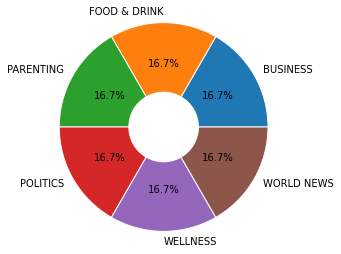

In [8]:
my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,autopct="%.1f%%")
plt.setp(my_pie, width=0.8, edgecolor='white') 
plt.show()

# 2. Limpiar el corpus
**ACTIVIDAD** 

*Eliminar signos de puntuación, de interrogación, admiración y elementos no léxicos (en general aquellos elementos ruidosos)*



### 2.0 Ambiente y funciones
**Importando biblioteca para el manejo de datos en el Procesamiento del Lenguaje Natural**

In [9]:
import nltk
from nltk.corpus import stopwords

**Importación de stopwords para la omitir datos innecesarios dentro de las noticias**

In [10]:
def create_corpus(target):
    corpus = []
    
    for x in dataFrame[dataFrame['category']==target ]['short_description'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

extras = ['wasnt', 'could', 'should', 'cannot', 'dont', 'doesnt', 'cant', 'shouldnt', 'couldnt', 'youre', 'im', 'hes', 'shes', 'theyre', 'whats', 'weve', 'whos']

STOPWORDS.update(extras)

STOPWORDS = [i.replace('\'', '') for i in STOPWORDS]

print(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['couldnt', 'for', 'both', 'myself', 'ma', 'with', 'before', 'didnt', 'is', 've', 'that', 'she', 'shouldnt', 'youll', 'cant', 'off', 'has', 'during', 'wasn', 'won', 'shouldnt', 'mustnt', 'whats', 'having', 'so', 'each', 'whos', 'you', 'very', 'did', 'hasn', 't', 'same', 'dont', 'we', 'theirs', 'll', 'about', 'here', 'how', 're', 'there', 'what', 'was', 'doesnt', 'this', 'wasnt', 'than', 'him', 'im', 'shes', 'will', 'shan', 'ourselves', 'be', 'not', 'mightnt', 'can', 'wouldnt', 'been', 'are', 'youre', 'its', 'who', 'couldn', 'do', 'does', 'most', 'all', 'dont', 'thatll', 'the', 'only', 'himself', 'below', 'own', 'ours', 'above', 'some', 'up', 'when', 'as', 'youd', 'they', 'yourself', 'doing', 'y', 'shes', 's', 'cannot', 'too', 'don', 'whom', 'werent', 'those', 'isnt', 'wouldn', 'theyre', 'no', 'had', 'after', 'ain', 'our', 'an', 'just', 'herself', 'arent', 'yours', 'youre', 'be

In [12]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

**Funciones destinadas a la limpieza de datos**

In [13]:
def turn_lower(text):
    low_text= text.lower()
    return low_text

In [14]:
import re
def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct

In [15]:
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove

In [16]:
def auxiliar_trash(text):
  remove= re.sub(r'[%|á|â|³|²|ð|ã|å|¹|_|¼]', '', text)
  return remove

### 2.1 **Aplicando las funciones para la limpieza de los datos en contenido**

In [17]:
data.head()

,category,headline,short_description,date,keywords
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand


In [18]:
data['clean_description'] = data['short_description'].apply(lambda x:turn_lower(x))
data['clean_description'] = data['clean_description'].apply(lambda x:remove_stopwords(x))
data.head()

,category,headline,short_description,date,keywords,clean_description
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN,"little-known northern california town, establi..."
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw,it's getting crowded investment crowdfunding s...
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons,even though might literally sending wrong mess...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days,deal coming soon.
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand,many leaders operate meeting brand doesn't dir...


In [19]:
data['clean_description'] = data['clean_description'].apply(lambda x:punct_remove(x))
data['clean_description'] = data['clean_description'].apply(lambda x:remove_num(x))
data['clean_description'] = data['clean_description'].apply(lambda x:auxiliar_trash(x))
data['clean_description'] = data['clean_description'].apply(lambda x:remove_stopwords(x))
data.head()

,category,headline,short_description,date,keywords,clean_description
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN,littleknown northern california town establish...
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw,getting crowded investment crowdfunding space ...
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons,even though might literally sending wrong mess...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days,deal coming soon
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand,many leaders operate meeting brand directly af...


### 2.2 Aplicando las funciones para la limpieza de los datos en título o header 

In [20]:
data.head()

,category,headline,short_description,date,keywords,clean_description
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN,littleknown northern california town establish...
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw,getting crowded investment crowdfunding space ...
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons,even though might literally sending wrong mess...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days,deal coming soon
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand,many leaders operate meeting brand directly af...


In [21]:
data['clean_headline'] = data['headline'].apply(lambda x:turn_lower(x))
data['clean_headline'] = data['clean_headline'].apply(lambda x:remove_stopwords(x))
data['clean_headline'] = data['clean_headline'].apply(lambda x:punct_remove(x))
data['clean_headline'] = data['clean_headline'].apply(lambda x:remove_num(x))
data['clean_headline'] = data['clean_headline'].apply(lambda x:remove_stopwords(x))
data.head()

,category,headline,short_description,date,keywords,clean_description,clean_headline
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN,littleknown northern california town establish...,americas expensive neighborhoods wall st
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw,getting crowded investment crowdfunding space ...,investment crowdfunding draws crowd
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons,even though might literally sending wrong mess...,office romances often sparked emoticonlaced em...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days,deal coming soon,verizon buy yahoo next days
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand,many leaders operate meeting brand directly af...,meeting brand


### 2.3 Omitiendo datos innecesarios

In [22]:
data = data.drop(['date'], axis='columns')
data.tail()

,category,headline,short_description,keywords,clean_description,clean_headline
29995,WORLD NEWS,"As A Refugee First-Responder, I've Seen People...",Many are willing to endure unthinkable horror ...,as-a-refugee-first-responder-ive-seen-people-r...,many willing endure unthinkable horror escape ...,refugee firstresponder ive seen people risk lo...
29996,WORLD NEWS,Why I No Longer Support Israel,Israel is facing the same kind of struggle tha...,why-i-no-longer-support-i,israel facing kind struggle many countries enc...,longer support israel
29997,WORLD NEWS,The Fate Of Europe Rests On The French-German ...,Macron and Merkel must figure out a common way...,eu-france-germany,macron merkel must figure common way forward o...,fate europe rests frenchgerman partnership
29998,WORLD NEWS,"Gunmen Kill Miriam Rodriguez, Activist Who Sea...",âMexico has become a very dangerous place fo...,miriam-rodriguez-died,mexico become dangerous place courage devote l...,gunmen kill miriam rodriguez activist searched...
29999,WORLD NEWS,Longtime Refugees Grateful for Citizenship in ...,Freedom. Happiness. Gratitude. These are words...,longtime-refugees-gratefu,freedom happiness gratitude words people use d...,longtime refugees grateful citizenship tanzania


# 3. Aplicar el algoritmo de BPE al corpus para obtener subpalabras:


##3.0 Funciones auxiliares

In [23]:
import re
from collections import Counter, defaultdict

In [24]:
#construcción del vocabulario con los caracteres de cada palabra separados por espacio, y la cantidad de veces que aparecen en el corpus
def construir_vocabulario(vocab):
  vocabulario = {}
  temp = []

  for t in vocab:
    #separamos cada carácter en la palabra por espacio
    t = " ".join(t)
    temp.append(t)
  
  vocabulario = Counter(temp)

  return vocabulario

In [25]:
#obtención de pares de símbolos del vocabulario de caracteres separados por espacio
def pares_simbolos(vocab):

    pairs = defaultdict(int)
    for word, frequency in vocab.items():
        symbols = word.split()

        #contando apariciones de pares
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += frequency

    return pairs

In [26]:
#unión del par más frecuente (se elimina el espacio separador) en todo el vocabulario
def fusionar_vocab(pair: tuple, v_in: dict):
    #combinamos los pares más frecuentes
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    
    for word in v_in:
        #reemplazamos el par más frecuente en todo el vocabulario
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]

    return v_out

##3.1 Formación del vocabulario inicial: 

**Cada palabra se asocia a la cadena de caracteres.**


###Contenido

In [27]:
#obtenemos la columna a la que aplicaremos BPE
tokens_cont = []
bpe_cont = data['clean_description'].tolist()
for renglon in bpe_cont:
  palabras = renglon.split()
  for p in palabras:
    tokens_cont.append(p)

print("Tamaño del vocabulario: " + str(len(tokens_cont)))

Tamaño del vocabulario: 378341


In [28]:
vocabulario_cont = construir_vocabulario(tokens_cont)

In [29]:
print("Vocabulario obtenido:")
print(vocabulario_cont)
print("Tamaño del vocabulario: " + str(len(vocabulario_cont)))

Vocabulario obtenido:
Counter({'o n e': 2180, 'u s': 1959, 'p e o p l e': 1727, 'n e w': 1713, 't i m e': 1708, 'l i k e': 1422, 'm a k e': 1206, 'm a n y': 1166, 'l i f e': 1114, 'd a y': 1096, 'g e t': 1081, 'w o u l d': 1047, 'y e a r s': 1021, 'k n o w': 995, 'e v e n': 947, 'm a y': 939, 'w a y': 915, 'y e a r': 901, 'c h i l d r e n': 880, 'w o r l d': 879, 'n e e d': 839, 'm u c h': 828, 'f i r s t': 821, 'w a n t': 814, 'k i d s': 799, 'a l s o': 792, 'g o o d': 771, 't a k e': 755, 't w o': 730, 't h i n k': 715, 's a i d': 711, 'h e l p': 708, 'p r e s i d e n t': 702, 'f o o d': 698, 'l a s t': 673, 'h e a l t h': 668, 't h i n g s': 666, 'e v e r y': 659, 't r u m p': 657, 'w o r k': 652, 'l o v e': 652, 'b e s t': 627, 'p a r e n t s': 618, 's t i l l': 593, 'l i t t l e': 591, 'r e a l l y': 579, 'w e e k': 578, 's o m e t h i n g': 565, 'w e l l': 561, 'r i g h t': 557, 's a y': 555, 'b a c k': 543, 'n e v e r': 536, 'b e t t e r': 535, 'f a m i l y': 534, 'b u s i n e s

###Títulos

In [30]:
#obtenemos la columna a la que aplicaremos BPE
tokens_head = []
bpe_head = data['clean_headline'].tolist()
for renglon in bpe_head:
  palabras = renglon.split()
  for p in palabras:
    tokens_head.append(p)

print("Tamaño del vocabulario: " + str(len(tokens_head)))

Tamaño del vocabulario: 179521


In [31]:
vocabulario_head = construir_vocabulario(tokens_head)

In [32]:
print("Vocabulario obtenido:")
print(vocabulario_head)
print("Tamaño del vocabulario: " + str(len(vocabulario_head)))

Vocabulario obtenido:
Counter({'t r u m p': 1319, 'n e w': 994, 'u s': 858, 'd a y': 829, 'p h o t o s': 814, 'b e s t': 680, 'k i d s': 675, 'v i d e o': 628, 'm a k e': 625, 'r e c i p e s': 620, 'f o o d': 565, 'd o n a l d': 519, 's a y s': 481, 'w a y s': 459, 'h e a l t h': 456, 'g e t': 405, 'w o m e n': 396, 'o n e': 393, 'k n o w': 393, 'p e o p l e': 390, 't i m e': 384, 'n e e d': 382, 'r e c i p e': 381, 's t u d y': 377, 'w o r l d': 374, 'l i f e': 352, 'b u s i n e s s': 347, 'm a y': 337, 't h i n g s': 329, 'p a r e n t s': 319, 'l o v e': 315, 't r u m p s': 315, 'b a b y': 314, 'c h i l d r e n': 307, 'l i k e': 301, 'f i r s t': 297, 'w a l l': 284, 't o p': 276, 'p r e s i d e n t': 275, 'h e l p': 274, 'g o o d': 264, 'w a n t': 262, 'w o r k': 260, 'a m e r i c a': 259, 'y e a r s': 254, 'b i g': 254, 't i p s': 254, 'y e a r': 243, 'w a y': 243, 'n o r t h': 243, 'b e t t e r': 241, 'g o p': 237, 'o b a m a': 236, 's t': 234, 'w a r': 233, 'a t t a c k': 232, 'm

## 3.2 Selección del número de iteraciones

###Contenido
Se utilizarán 1000 iteraciones, por el tamaño del corpus.

In [33]:
num_merges_cont = 1000  #hiperparámetro

###Títulos
Se utilizarán 800 iteraciones, por el tamaño del corpus.


In [34]:
num_merges_head = 1000  #hiperparámetro

## 3.3 Obtención del vocabulario final

**Cada palabra se asocia a la cadena de subpalabras.**


###Contenido

Advertencia: tarda alrededor de 2 minutos en ejecutarse.

In [35]:
#obtenemos una copia del vocabulario obtenido para realizar las sustituciones
vocab_cont = dict(vocabulario_cont).copy()

for i in range(num_merges_cont):

    #obtenemos los pares del vocabulario actual
    pares = pares_simbolos(vocab_cont)

    if not pares:
        break

    #obtenemos el par más frecuente y se reemplaza en el vocabulario
    best = max(pares, key = pares.get)
    #print("Par más frecuente: " + ''.join(best))
    #print("Par más frecuente: " + best[0] + " " + best[1])
    vocab_cont = fusionar_vocab(best, vocab_cont)

In [36]:
print("\nVocabulario obtenido:")
print(vocab_cont)
print("Tamaño del vocabulario: " + str(len(vocab_cont)))


Vocabulario obtenido:
{'little know n': 2, 'nor ther n': 38, 'c ali for ni a': 76, 'tow n': 73, 'est ab lish ed': 18, 'years': 1021, 'ago': 238, 'tr act': 2, 'land': 69, 'ow ned': 13, 's co t ti sh': 8, 'li qu or': 9, 'getting': 316, 'c row d ed': 10, 'inv est ment': 59, 'c row d fun ding': 14, 'sp ace': 78, 'thats': 362, 'ex c ell ent': 34, 'news': 412, 'al most': 180, 'as set': 11, 'ben ef it': 57, 'ty p es': 39, 'suc ce ed': 31, 'cau se': 128, 'still': 593, 'ni che': 10, 'pl at form s': 17, 'la unch': 41, 'even': 947, 'though': 223, 'might': 432, 'li ter ally': 41, 's ending': 35, 'wr ong': 191, 'm ess age': 86, 'major ity': 112, 'mal e': 31, 'fe mal e': 68, 'work ers': 203, 'say': 555, 'deal': 223, 'coming': 119, 'so on': 94, 'many': 1166, 'leaders': 223, 'op er ate': 21, 'me e ting': 91, 'br and': 114, 'dire ct ly': 43, 'af fect': 42, 'prof es sion al': 58, 'ar gu e': 39, 'one': 2180, 'prof es sion als': 38, 'sp end': 106, 'work': 652, 'day': 1096, 'me e ting s': 30, 'per ce p ti

###Títulos



Advertencia: tarda alrededor de 1 minuto y 30 segundos en ejecutarse.

In [37]:
#obtenemos una copia del vocabulario obtenido para realizar las sustituciones
vocab_head = dict(vocabulario_head).copy()

for i in range(num_merges_head):

    #obtenemos los pares del vocabulario actual
    pares = pares_simbolos(vocab_head)

    if not pares:
        break

    #obtenemos el par más frecuente y se reemplaza en el vocabulario
    best = max(pares, key = pares.get)
    #print("Par más frecuente: " + ''.join(best))
    #print("Par más frecuente: " + best[0] + " " + best[1])
    vocab_head = fusionar_vocab(best, vocab_head)

In [38]:
print("\nVocabulario obtenido:")
print(vocab_head)
print("Tamaño del vocabulario: " + str(len(vocab_head)))


Vocabulario obtenido:
{'americas': 122, 'exp ens ive': 27, 'ne igh bor hood s': 9, 'wall': 284, 'st': 234, 'invest ment': 17, 'cr ow d fun ding': 19, 'd ra w s': 14, 'cr ow d': 24, 'off ice': 65, 'r om anc es': 2, 'o ft en': 16, 'sp ar k ed': 6, 'em ot ic on l ac ed': 2, 'email s': 20, 'sur ve y': 39, 'ver iz on': 19, 'bu y': 76, 'y ah oo': 21, 'next': 135, 'days': 128, 'meet ing': 52, 'br and': 41, 'fed s': 24, 'o k': 41, 'char ter': 11, 'time': 384, 'war ner': 20, 'me g a': 9, 'mer ger': 21, 'us': 858, 'econom y': 81, 'grow s': 16, 'per cent': 60, 'sec ond': 64, 'qu ar ter': 3, 'inv ent or ies': 1, 'fall': 79, 'bl ow': 21, 'b oss s': 2, 'mind': 72, 'gr oss': 9, 'd om est ic': 25, 'problem': 99, 'sho ot': 11, 'me as ure ment': 1, 'w to': 9, 'se att le': 26, 'years': 254, 'ag o': 24, 'r id ic ul ous': 14, 'things': 329, 'come': 55, 'ce os': 38, 'm ou th s': 5, 'cy ber crim e': 2, 'sch em e': 10, 'attacks': 115, 'email': 99, 'ac coun ts': 18, 'bank': 89, 'city': 105, 'w el com ing': 5,

## 3.4 Sustitución del corpus por tokenización en subpalabras 

Se obtiene un tercer diccionario que relaciona las palabras originales con su subpalabras correspondientes, para así poder crear una columna extra con la sustitución del texto limpio por los tokens.

###Contenido

In [39]:
subwords_cont = {}

#obtenemos la palabra original a partir de las subpalabras, y creamos un diccionario con las palabras originales como llaves y las subpalabras (con indicador de fin de palabra) como valor
for subword in vocab_cont:
  original = subword.replace(" ", "")
  sw_end = "{0}@".format(subword)
  subwords_cont[original] = sw_end

In [40]:
data['subword_description'] = data['clean_description']

In [41]:
#obtenemos la columna a sustituir
swtoken_cont = data['subword_description'].tolist()
swtoken_row_cont = list()
for row in swtoken_cont:
  tkn_sentence = row
  words = row.split()
  for word in words:
    tkn_sentence = tkn_sentence.replace(word, subwords_cont[word])
  swtoken_row_cont.append(tkn_sentence)

data['subword_description'] = swtoken_row_cont
data.head()

,category,headline,short_description,keywords,clean_description,clean_headline,subword_description
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",NaN,littleknown northern california town establish...,americas expensive neighborhoods wall st,little know n@ nor ther n@ c ali for ni a@ tow...
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,investment-crowdfunding-draw,getting crowded investment crowdfunding space ...,investment crowdfunding draws crowd,getting@ c row d ed@ inv est ment@ c row d fun...
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,office-romances-emoticons,even though might literally sending wrong mess...,office romances often sparked emoticonlaced em...,even@ though@ might@ li ter ally@ s ending@ wr...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,verizon-could-buy-yahoo-next-few-days,deal coming soon,verizon buy yahoo next days,deal@ coming@ so on@
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,whats-your-meeting-brand,many leaders operate meeting brand directly af...,meeting brand,many@ leaders@ op er ate@ me e ting@ br and@ d...


###Títulos

In [42]:
subwords_head = {}

#obtenemos la palabra original a partir de las subpalabras, y creamos un diccionario con las palabras originales como llaves y las subpalabras (con indicador de fin de palabra) como valor
for subword in vocab_head:
  original = subword.replace(" ", "")
  sw_end = "{0}@".format(subword)
  subwords_head[original] = sw_end

In [43]:
data['subword_headline'] = data['clean_headline']

In [44]:
#obtenemos la columna a sustituir
swtoken_head = data['subword_headline'].tolist()
swtoken_row_head = list()
for row in swtoken_head:
  tkn_sentence = row
  words = row.split()
  for word in words:
    tkn_sentence = tkn_sentence.replace(word, subwords_head[word])
  swtoken_row_head.append(tkn_sentence)

data['subword_headline'] = swtoken_row_head
data.head()

,category,headline,short_description,keywords,clean_description,clean_headline,subword_description,subword_headline
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",NaN,littleknown northern california town establish...,americas expensive neighborhoods wall st,little know n@ nor ther n@ c ali for ni a@ tow...,americas@ exp ens ive@ ne igh bor hood s@ wall...
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,investment-crowdfunding-draw,getting crowded investment crowdfunding space ...,investment crowdfunding draws crowd,getting@ c row d ed@ inv est ment@ c row d fun...,invest ment@ cr ow d fun ding@ d ra w s@ cr ow d@
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,office-romances-emoticons,even though might literally sending wrong mess...,office romances often sparked emoticonlaced em...,even@ though@ might@ li ter ally@ s ending@ wr...,off ice@ r om anc es@ o ft en@ sp ar k ed@ em ...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,verizon-could-buy-yahoo-next-few-days,deal coming soon,verizon buy yahoo next days,deal@ coming@ so on@,ver iz on@ bu y@ y ah oo@ next@ days@
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,whats-your-meeting-brand,many leaders operate meeting brand directly af...,meeting brand,many@ leaders@ op er ate@ me e ting@ br and@ d...,meet ing@ br and@


#Resultado Final

In [45]:
data = data[['category',	'headline',	'short_description',	'keywords',	'clean_headline',	'clean_description',	'subword_headline',	'subword_description']]

In [46]:
data.head()

,category,headline,short_description,keywords,clean_headline,clean_description,subword_headline,subword_description
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",NaN,americas expensive neighborhoods wall st,littleknown northern california town establish...,americas@ exp ens ive@ ne igh bor hood s@ wall...,little know n@ nor ther n@ c ali for ni a@ tow...
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,investment-crowdfunding-draw,investment crowdfunding draws crowd,getting crowded investment crowdfunding space ...,invest ment@ cr ow d fun ding@ d ra w s@ cr ow d@,getting@ c row d ed@ inv est ment@ c row d fun...
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,office-romances-emoticons,office romances often sparked emoticonlaced em...,even though might literally sending wrong mess...,off ice@ r om anc es@ o ft en@ sp ar k ed@ em ...,even@ though@ might@ li ter ally@ s ending@ wr...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,verizon-could-buy-yahoo-next-few-days,verizon buy yahoo next days,deal coming soon,ver iz on@ bu y@ y ah oo@ next@ days@,deal@ coming@ so on@
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,whats-your-meeting-brand,meeting brand,many leaders operate meeting brand directly af...,meet ing@ br and@,many@ leaders@ op er ate@ me e ting@ br and@ d...


In [47]:
data.tail()

,category,headline,short_description,keywords,clean_headline,clean_description,subword_headline,subword_description
29995,WORLD NEWS,"As A Refugee First-Responder, I've Seen People...",Many are willing to endure unthinkable horror ...,as-a-refugee-first-responder-ive-seen-people-r...,refugee firstresponder ive seen people risk lo...,many willing endure unthinkable horror escape ...,refuge e@ fir str es p on der@ ive@ se en@ peo...,many@ w ill ing@ end ure@ un think able@ h or ...
29996,WORLD NEWS,Why I No Longer Support Israel,Israel is facing the same kind of struggle tha...,why-i-no-longer-support-i,longer support israel,israel facing kind struggle many countries enc...,lon ger@ support@ israel@,is ra el@ fac ing@ kind@ stru gg le@ many@ cou...
29997,WORLD NEWS,The Fate Of Europe Rests On The French-German ...,Macron and Merkel must figure out a common way...,eu-france-germany,fate europe rests frenchgerman partnership,macron merkel must figure common way forward o...,f ate@ eur ope@ res ts@ fren ch ger man@ part ...,m ac r on@ mer ke l@ must@ f ig ure@ common@ w...
29998,WORLD NEWS,"Gunmen Kill Miriam Rodriguez, Activist Who Sea...",âMexico has become a very dangerous place fo...,miriam-rodriguez-died,gunmen kill miriam rodriguez activist searched...,mexico become dangerous place courage devote l...,gun men@ kill@ m ir i am@ ro dr ig ue z@ act i...,me x ic o@ become@ d an ger ous@ place@ cou ra...
29999,WORLD NEWS,Longtime Refugees Grateful for Citizenship in ...,Freedom. Happiness. Gratitude. These are words...,longtime-refugees-gratefu,longtime refugees grateful citizenship tanzania,freedom happiness gratitude words people use d...,long time@ refuge es@ gr ate ful@ c it iz en s...,fre ed om@ happ iness@ g ra ti tu de@ wor ds@ ...


# Export data to next step of our project

In [48]:
data.to_csv ('final_corpus.csv', index = True, header=True)
